Fast Fourier Transform Example
==
Example image (https://en.wikipedia.org/wiki/Fast_Fourier_transform#/media/File:FFT_of_Cosine_Summation_Function.svg)

@Author yying

In [1]:
#dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft

Fourier analysis converts a signal from its original domain (often time or space) to a representation in the frequency domain (https://en.wikipedia.org/wiki/Fast_Fourier_transform). This comes from the the assumption that any periodic function can be approximated by sum of sine / cosine functions.

Overview of Steps:
- Given $(X_{k}, k)$ (amplitude vs step), find $(x_n, n)$ with FFT according to the following equation
$$$$
$$X_{k}=\sum_{n=0}^{N-1} x_{n}e^{-i2\pi kn/N}$$
$$$$
where $x_{n}\in \mathbb{C}$. Note that second half of the data is just mirroring of first half of data.
- To seperate real and imaginary part, let $x_{n} = a_{n} + ib_{n}$ where $a_{n}, b_{n} \in \mathbb{R}$. Therefore, we have:
$$$$
$$X_{k} = \sum_{n=0}^{N-1} (a_{n}+ib_{n})(\cos(-2\pi kn/N)+i\sin(-2\pi kn/N))$$
$$$$
Because LHS is real number, the imaginary part must cancel out in FFT result:
$$$$
$$X_{k} = \sum_{n=0}^{N-1} (a_{n}\cos(2\pi kn/N)+b_{n}\sin(2\pi kn/N))$$
$$$$
We can see that real part $a_{n}$ corresponds to the arbitrary amplitude of even component (cosine) and imaginary part $b_{n}$ corresponds to the arbitrary amplitude of odd component (sine). This is the same representation of any simple harmonic vibration as $a_{n} = p\cos k$ and $b_{n} = p\sin k$:
$$$$
$$p\sin(\theta + k) = (p\cos k)\sin\theta+(p\sin k)\cos\theta$$
$$$$
where $p,k$ are real constants.
- To get the arbitrary amplitude $p$ of a given $n$, because $a_{n} = p\cos k$ and $b_{n} = p\sin k$:
$$$$
$$p = \sqrt{p^2(\sin^2 k + \cos^2 k)} = \sqrt{a_{n}^2 + b_{n}^2} = ||{x_{n}}|| $$
$$$$
- After obtaining $(||x_n||, n)$ (arb. amplitude vs step), convert step to frequency with:
$$$$
$$\text{Freq} = \text{SamplingRate} * \text{Bin / TotalSteps}$$
$$$$
Because $\text{SamplingRate} = \text{1 / TimeStep} = 1/\Delta t$:
$$$$
$$\text{Freq} = \frac{n}{N\Delta t} = \frac{n}{t_{tot}}$$
$$$$

In [2]:
#example vibration
def combinedVibration(time, n = 5, omega = 62.8): #time in sec
    vibrationSum = 0;
    for i in range(1, n + 1):
        vibrationSum += i * np.cos(i * omega * time)
    return vibrationSum

$$X=\sum_{n=1}^{5}n\cos(20\pi nt)$$

In [3]:
#vibration sampling constants
timeStep = 0.001 #sec; Delta(t)
numStep = 500 #TotalSteps; N
samplingRate = 1/timeStep

In [4]:
#calculate time vs vibration
timeScale = np.linspace(0, timeStep * numStep, numStep + 1) #0.5 sec, 500 samples
vibrationOutput = combinedVibration(timeScale, 5, 62.8)

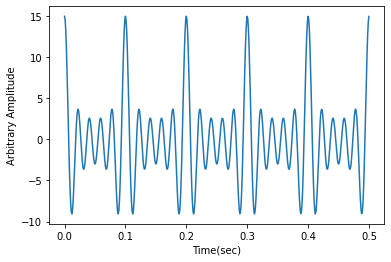

In [5]:
#plt t vs vib
plt.plot(timeScale, vibrationOutput)
plt.xlabel("Time(sec)")
plt.ylabel("Arbitrary Amplitude")
plt.show()

In [6]:
fftResult = fft(vibrationOutput)
shiftedResult = np.abs(fftResult)[:numStep // 2] * 1 / numStep #second half is only imaging of first half

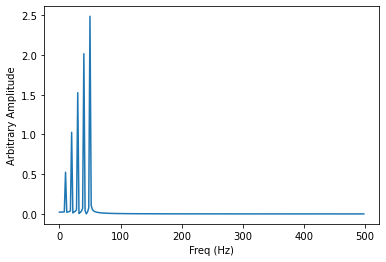

In [7]:
#fft result
plt.plot((samplingRate * np.linspace(0,249,250)/numStep), shiftedResult)
plt.xlabel("Freq (Hz)")
plt.ylabel("Arbitrary Amplitude")
plt.show()

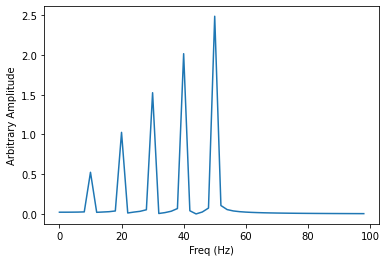

In [8]:
# cut off at 100Hz
plt.plot((samplingRate * np.linspace(0,249,250)/numStep)[:50], shiftedResult[:50])
plt.xlabel("Freq (Hz)")
plt.ylabel("Arbitrary Amplitude")
plt.show()

FFT result: Sum of waves at 10, 20, 30, 40, 50 Hz.